# Reading the data

In [3]:
# UPLOADING DATA FILE

from google.colab import files

upload = files.upload()

Saving Coal Reserves Production by State.csv to Coal Reserves Production by State.csv


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Coal Reserves Production by State.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Name of the coal field,Type of coal,Depth of the reserve,Type of reserve,Coal reserved quantity
0,1,India,9,Uttar Pradesh,2011,SINGRAULI,NON-COKING,0-300,INDICATED,195.75
1,2,India,9,Uttar Pradesh,2011,SINGRAULI,NON-COKING,0-300,PROVED,866.05
2,3,India,9,Uttar Pradesh,2012,SINGRAULI,NON-COKING,0-300,INDICATED,177.76
3,4,India,9,Uttar Pradesh,2012,SINGRAULI,NON-COKING,0-300,PROVED,884.04
4,5,India,9,Uttar Pradesh,2013,SINGRAULI,NON-COKING,0-300,INDICATED,177.76
...,...,...,...,...,...,...,...,...,...,...
3364,3365,India,36,Telangana,2020,GODAVARI,NON-COKING,300-600,INFERRED,518.08
3365,3366,India,36,Telangana,2020,GODAVARI,NON-COKING,300-600,PROVED,4096.55
3366,3367,India,36,Telangana,2020,GODAVARI,NON-COKING,600-1200,INDICATED,1416.81
3367,3368,India,36,Telangana,2020,GODAVARI,NON-COKING,600-1200,INFERRED,2122.48


# Some basic insights into data

In [5]:
df.describe()

,Rowid,State lgd code,Year,Coal reserved quantity
count,3369.000000,3369.000000,3369.000000,3369.000000
mean,1685.000000,21.246067,2015.582072,920.182408
std,972.690855,4.142754,2.875668,2070.395265
min,1.000000,9.000000,2011.000000,0.030000
25%,843.000000,20.000000,2013.000000,31.230000
50%,1685.000000,20.000000,2016.000000,177.700000
75%,2527.000000,23.000000,2018.000000,818.420000
max,3369.000000,36.000000,2020.000000,21531.120000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rowid                   3369 non-null   int64  
 1   Country                 3369 non-null   object 
 2   State lgd code          3369 non-null   int64  
 3   State                   3369 non-null   object 
 4   Year                    3369 non-null   int64  
 5   Name of the coal field  3369 non-null   object 
 6   Type of coal            3369 non-null   object 
 7   Depth of the reserve    3369 non-null   object 
 8   Type of reserve         3369 non-null   object 
 9   Coal reserved quantity  3369 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 263.3+ KB


In [7]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                     0
Country                   0
State lgd code            0
State                     0
Year                      0
Name of the coal field    0
Type of coal              0
Depth of the reserve      0
Type of reserve           0
Coal reserved quantity    0
dtype: int64


So there are no null entries in our data. 

In [8]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 3369 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 15 unique values
Column "State" has 15 unique values
Column "Year" has 10 unique values
Column "Name of the coal field" has 65 unique values
Column "Type of coal" has 5 unique values
Column "Depth of the reserve" has 4 unique values
Column "Type of reserve" has 3 unique values
Column "Coal reserved quantity" has 1040 unique values


# Statewise reserves

In [9]:
states=df['State'].unique()
print(states)

['Uttar Pradesh' 'Bihar' 'Sikkim' 'Arunachal Pradesh' 'Nagaland'
 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh'
 'Maharashtra' 'Madhya Pradesh' 'Andhra Pradesh' 'Telangana']


In [11]:
df2 = df.groupby('State').apply(lambda x: x['Coal reserved quantity'].unique().sum())
print(df2)

State
Andhra Pradesh        42751.136675
Arunachal Pradesh        90.230000
Assam                   553.432000
Bihar                  7144.670000
Chhattisgarh         374470.040000
Jharkhand            272946.270000
Madhya Pradesh       194805.750000
Maharashtra           58994.240000
Meghalaya               596.880000
Nagaland                546.850000
Odisha               623544.150000
Sikkim                  101.230000
Telangana            152498.443325
Uttar Pradesh          2123.600000
West Bengal          234593.350000
dtype: float64


In [12]:
df1=df2.sort_values()
print(df1)

State
Arunachal Pradesh        90.230000
Sikkim                  101.230000
Nagaland                546.850000
Assam                   553.432000
Meghalaya               596.880000
Uttar Pradesh          2123.600000
Bihar                  7144.670000
Andhra Pradesh        42751.136675
Maharashtra           58994.240000
Telangana            152498.443325
Madhya Pradesh       194805.750000
West Bengal          234593.350000
Jharkhand            272946.270000
Chhattisgarh         374470.040000
Odisha               623544.150000
dtype: float64


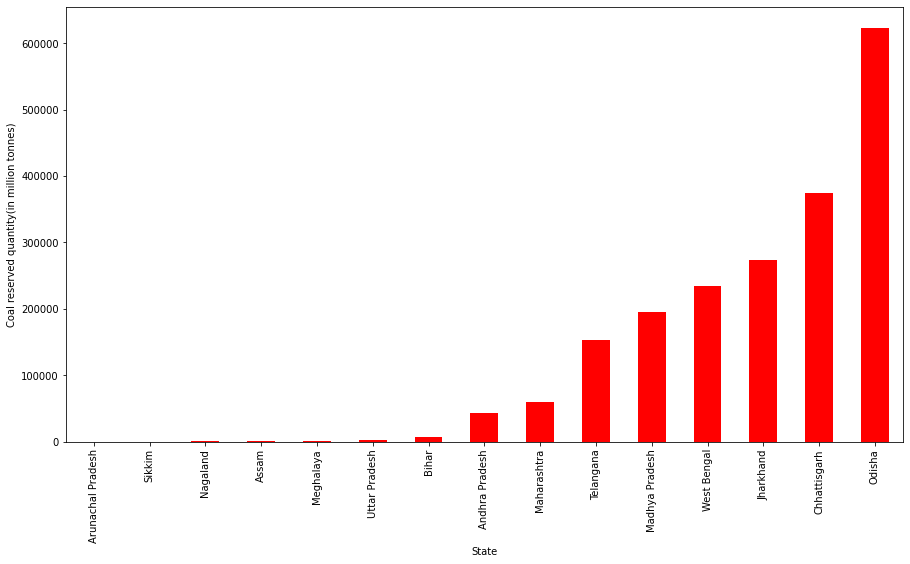

In [13]:
df1.plot(kind='bar', y='Coal reserved quantity',figsize=(15,8),ylabel='Coal reserved quantity(in million tonnes)',color='red')

# Year Wise reserves

In [14]:
dfy = df.groupby('Year').apply(lambda x: x['Coal reserved quantity'].unique().sum())
print(dfy)

Year
2011    285825.380
2012    293348.740
2013    298877.230
2014    301527.102
2015    306555.980
2016    308749.540
2017    315111.980
2018    318980.480
2019    326458.800
2020    343984.010
dtype: float64


Text(0, 0.5, 'Coal reserved quantity (in million tonnes)')

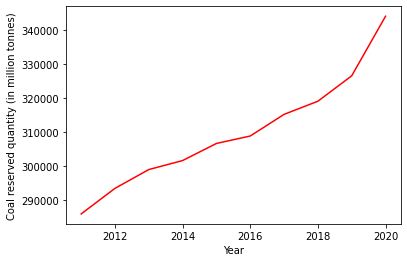

In [15]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Coal reserved quantity (in million tonnes)")

# Typewise reserves

In [21]:
dft = df.groupby('Type of coal').apply(lambda x: x['Coal reserved quantity'].unique().sum())
print(dft)

Type of coal
HIGH SULPHUR        1753.272
MEDIUM COKING      69837.560
NON-COKING       1876041.760
PRIME COKING       15931.160
SEMI-COKING         2383.060
dtype: float64


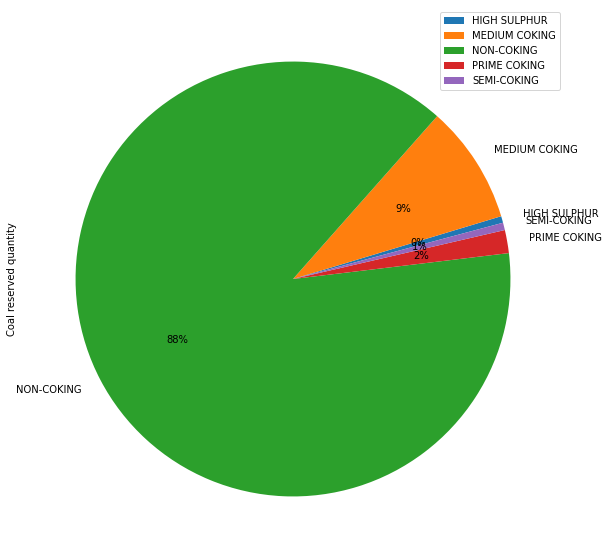

In [31]:
df.groupby(['Type of coal']).sum().plot(kind='pie', y='Coal reserved quantity',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)

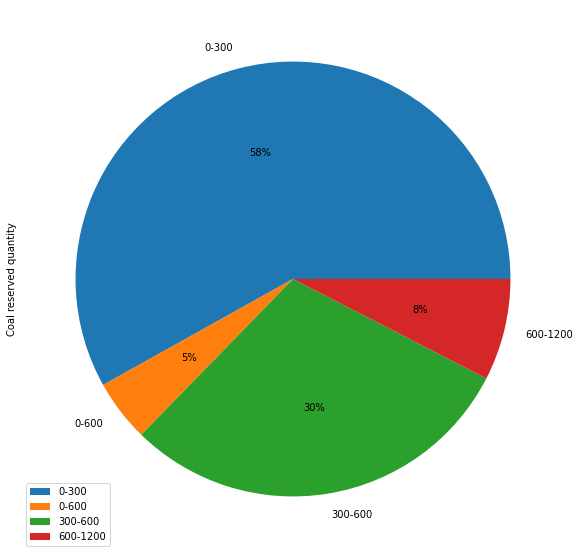

In [23]:
df.groupby(['Depth of the reserve']).sum().plot(kind='pie', y='Coal reserved quantity',autopct='%1.0f%%',figsize=(10,10),xlabel="Depth of reserve (in meters) ")

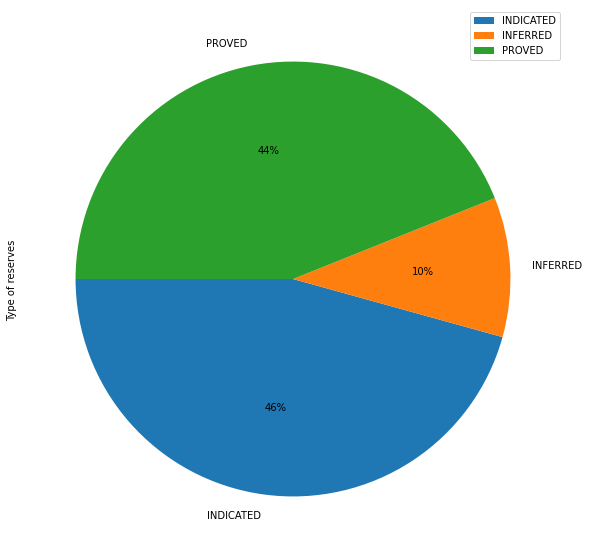

In [35]:
df.groupby(['Type of reserve']).sum().plot(kind='pie', y='Coal reserved quantity',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=180)